


# A Simple Machine learning model to classify using supervised learning



**Problem statement**: In this model we will take a dataset for checking if Bank Note is Authentic or Not

***Prerequisite:*** Knowledge of python, numpy and pandas


In [25]:
import numpy as np
import pandas as pd

In supervised machine learning, we generate a model by providing input i.e. features and output i.e. target

Here we will read a CSV (comma separated) file having features of bank notes and target variable telling it is authentic or not?
Courtesy: https://archive.ics.uci.edu/dataset/267/banknote+authentication

In [26]:
# Reading the dataset from local directory
df_banknote = pd.read_csv('banknote_authentication.csv')

In [27]:
#Let us analyze shape of Dataset, the first value shows number of samples and second value shows number of features
df_banknote.shape

(1371, 5)

In [28]:
#Let us analyze shape of Dataset, the first value shows number of samples and second value shows number of features
df_banknote.columns

Index(['3.6216', '8.6661', '-2.8073', '-0.44699', '0'], dtype='object')

As you can see this dataset do not have headers, sometimes we get dataset with headers and sometime we don't get header row

In [29]:
#Adding a header to dataset
new_headers = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Authentic']
df_banknote.columns = new_headers
df_banknote.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Authentic'], dtype='object')

The variance, skewness, kurtosis, and entropy are statistical features extracted from wavelet-transformed images of banknotes to determine their authenticity. These features are key inputs for machine learning models that classify notes as genuine or counterfeit.
To understand more about these statistical term please watch https://youtu.be/nH7gORAiBC8?si=pATJQMJNZQv-WhUm

In [30]:
# lets see the data description
df_banknote.describe()

,Variance,Skewness,Curtosis,Entropy,Authentic
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


To train a model we need to divide the data in training set and test set which can be in ratio of (70:30), or (75: 25), or (80:20)

In [31]:
#lets split the data into 80:20 with balanced distribution of target variable
from sklearn.model_selection import train_test_split
df_banknotes_train, df_banknotes_test = train_test_split(df_banknote, test_size=0.2,stratify=df_banknote['Authentic'], random_state=42)


In [32]:
#Let us look at the shape of datasets
print(df_banknotes_train.shape, df_banknotes_test.shape)


(1096, 5) (275, 5)


In [33]:
# Now we will split train and test data set into features and target
banknotes_features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']
banknotes_target = ['Authentic']
X_train = df_banknotes_train[banknotes_features]
y_train = df_banknotes_train[banknotes_target]
X_test = df_banknotes_test[banknotes_features]
y_test = df_banknotes_test[banknotes_target]



Now let select a model and train it with our dataset


In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
banknotes_model = DecisionTreeClassifier()
banknotes_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# Now test the Model with test dataset
y_pred = banknotes_model.predict(X_test)


In [36]:
#Check the accuracy of Model with predicted value and actual target value
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9781818181818182


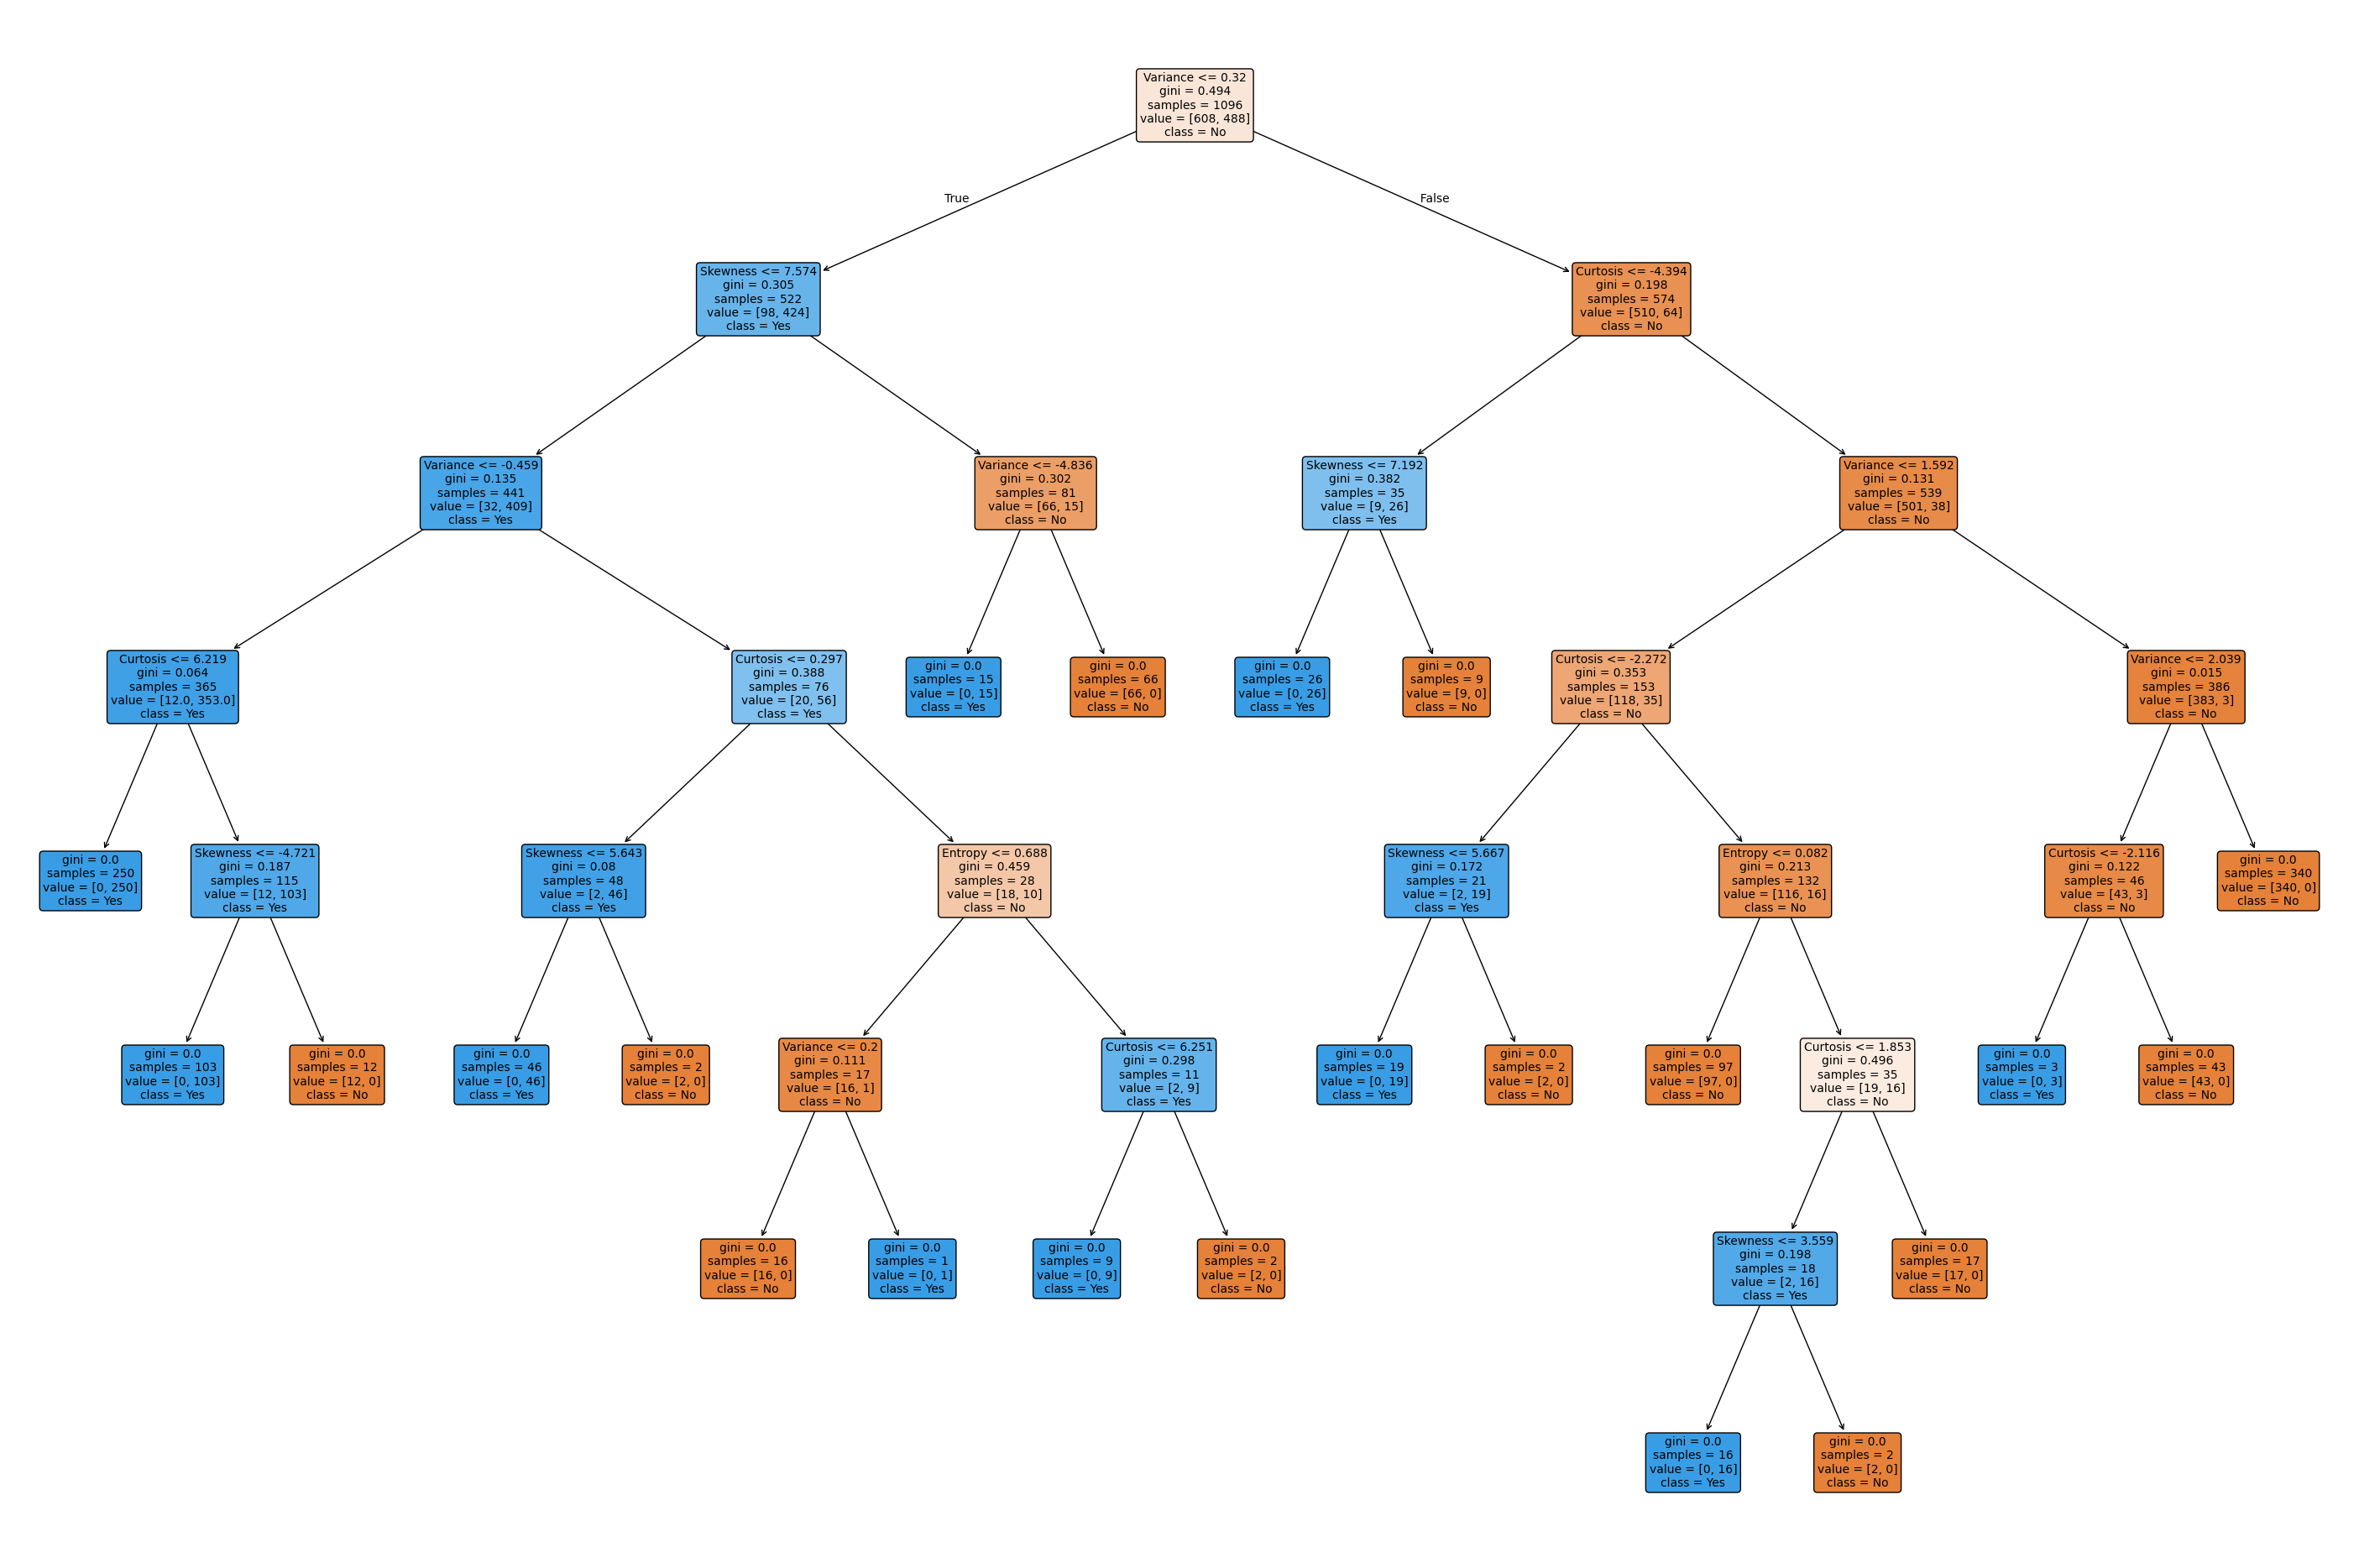

In [37]:
#Lets Analyze How DecisionTreeClassifier Model Classify the Data
import matplotlib.pyplot as plt
plt.figure(figsize=(36, 24))
banknotes_names=["No","Yes"]

plot_tree(banknotes_model,
          feature_names=banknotes_features,
          class_names= banknotes_names,
          filled=True,         # Color nodes by class/value
          rounded=True,        # Rounded node corners
          fontsize=10)         # Adjust font size

plt.show()
